# Clean GSS Variables used in Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import thinkstats2
import thinkplot

import utils
from utils import decorate

In [2]:
def read_gss(dirname):
    """Reads GSS files from the given directory.
    
    dirname: string
    
    returns: DataFrame
    """
    dct = utils.read_stata_dict(dirname + '/GSS.dct')
    gss = dct.read_fixed_width(dirname + '/GSS.dat.gz',
                             compression='gzip')
    return gss

In [3]:
# Read in the GSS variables.
gss = read_gss('gss_vars')

## Clean the Data

In [4]:
gss.head()

,ballot,fund,other,denom,relig,cappun,libhomo,colhomo,spkhomo,natfare,...,nateduc,natdrug,natcity,natheal,natenvir,natspac,polviews,partyid,size,year
0,0,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,2,72,1972
1,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,72,1972
2,0,2,0,28,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,72,1972
3,0,9,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,72,1972
4,0,2,0,28,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,72,1972


In [5]:
gss.columns

Index(['ballot', 'fund', 'other', 'denom', 'relig', 'cappun', 'libhomo',
       'colhomo', 'spkhomo', 'natfare', 'attend', 'reliten', 'realrinc',
       'marhomo', 'homosex', 'hapmar', 'raclive', 'fund16', 'oth16', 'denom16',
       'relig16', 'nataid', 'natarms', 'natrace', 'res16', 'race', 'sex',
       'educ', 'age', 'divorce', 'marital', 'wrkstat', 'id_', 'reg16',
       'region', 'nateduc', 'natdrug', 'natcity', 'natheal', 'natenvir',
       'natspac', 'polviews', 'partyid', 'size', 'year'],
      dtype='object')

In [6]:
# Remove reponses of Not Applicable and No Answer
# In some cases also Don't Know answers 

gss['nataid'].replace([0,8,9], np.nan, inplace=True)
gss['natarms'].replace([0,8,9], np.nan, inplace=True)
gss['natrace'].replace([0,8,9], np.nan, inplace=True)
gss['res16'].replace([0,8,9], np.nan, inplace=True)
gss['educ'].replace([98,99], np.nan, inplace=True)
gss['age'].replace([89,98,99], np.nan, inplace=True)
gss['divorce'].replace([0,9,9], np.nan, inplace=True)
gss['marital'].replace([9], np.nan, inplace=True)
gss['wrkstat'].replace([9], np.nan, inplace=True)
gss['nateduc'].replace([0,8,9], np.nan, inplace=True)
gss['natdrug'].replace([0,8,9], np.nan, inplace=True)
gss['natcity'].replace([0,8,9], np.nan, inplace=True)
gss['natheal'].replace([0,8,9], np.nan, inplace=True)
gss['natenvir'].replace([0,8,9], np.nan, inplace=True)
gss['natspac'].replace([0,8,9], np.nan, inplace=True)
gss['polviews'].replace([0,8,9], np.nan, inplace=True)
gss['partyid'].replace([8,9], np.nan, inplace=True)

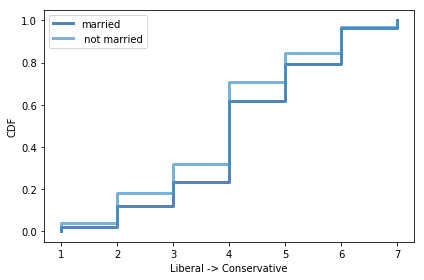

In [7]:
married = gss[gss['marital']==1]
not_married = gss[gss['marital'] > 1]

mar_cdf = thinkstats2.Cdf(married['polviews'])
not_mar_cdf = thinkstats2.Cdf(not_married['polviews'])
thinkplot.PrePlot(2)
thinkplot.cdf(mar_cdf, label = 'married')
thinkplot.cdf(not_mar_cdf, label = ' not married')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'CDF')

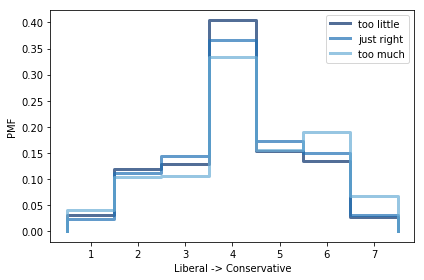

In [8]:
drug_little = gss[gss['natdrug']==1]
drug_right = gss[gss['natdrug'] == 2]
drug_lot = gss[gss['natdrug'] == 3]

drug_little_pmf = thinkstats2.Pmf(drug_little['polviews'])
drug_right_pmf= thinkstats2.Pmf(drug_right['polviews'])
drug_lot_pmf = thinkstats2.Pmf(drug_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(drug_little_pmf, label = 'too little')
thinkplot.pmf(drug_right_pmf, label = 'just right')
thinkplot.pmf(drug_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

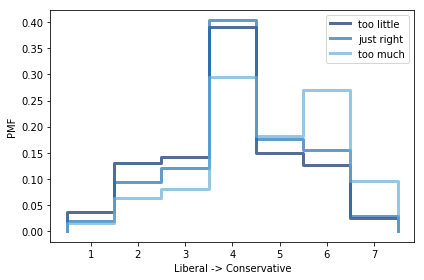

In [9]:
educ_little = gss[gss['nateduc']==1]
educ_right = gss[gss['nateduc'] == 2]
educ_lot = gss[gss['nateduc'] == 3]

educ_little_pmf = thinkstats2.Pmf(educ_little['polviews'])
educ_right_pmf= thinkstats2.Pmf(educ_right['polviews'])
educ_lot_pmf = thinkstats2.Pmf(educ_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(educ_little_pmf, label = 'too little')
thinkplot.pmf(educ_right_pmf, label = 'just right')
thinkplot.pmf(educ_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

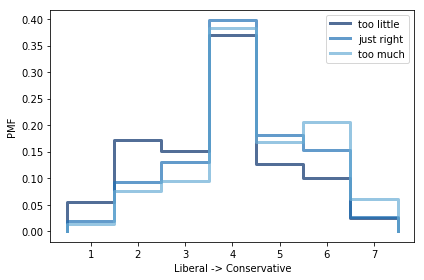

In [10]:
race_little = gss[gss['natrace']==1]
race_right = gss[gss['natrace'] == 2]
race_lot = gss[gss['natrace'] == 3]

race_little_pmf = thinkstats2.Pmf(race_little['polviews'])
race_right_pmf= thinkstats2.Pmf(race_right['polviews'])
race_lot_pmf = thinkstats2.Pmf(race_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(race_little_pmf, label = 'too little')
thinkplot.pmf(race_right_pmf, label = 'just right')
thinkplot.pmf(race_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

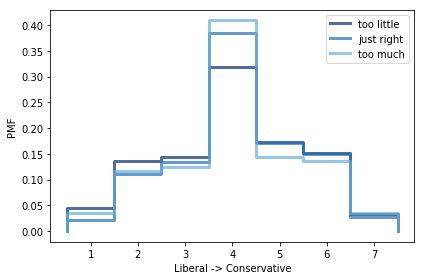

In [11]:
spac_little = gss[gss['natspac']==1]
spac_right = gss[gss['natspac'] == 2]
spac_lot = gss[gss['natspac'] == 3]

spac_little_pmf = thinkstats2.Pmf(spac_little['polviews'])
spac_right_pmf= thinkstats2.Pmf(spac_right['polviews'])
spac_lot_pmf = thinkstats2.Pmf(spac_lot['polviews'])
thinkplot.PrePlot(3)
thinkplot.pmf(spac_little_pmf, label = 'too little')
thinkplot.pmf(spac_right_pmf, label = 'just right')
thinkplot.pmf(spac_lot_pmf, label = 'too much')
decorate(xlabel = 'Liberal -> Conservative',
        ylabel = 'PMF')

## Clean the Data

The `ballot` variable indicates the ballot used for each interview. We replace the 'Not applicable' code with NaNs.

Code | Label
--- | ---
1 | ballot a
2 | ballot b
3 | ballot c
4 | ballot d
0 | not applicable

In [12]:
print(gss['ballot'].value_counts())

0    21875
2    13917
3    13798
1    13706
4     1518
Name: ballot, dtype: int64


In [13]:
gss['ballot'] = gss['ballot'].replace([0], np.nan);

The `spkhomo` variable indicates respondents feel a homosexual man should be allowed to make a speech in their community.

Code | Label
--- | ---
1 | Allowed
2 | Not allowed
8 | Don't know
9 | No answer
0 | Not applicable

In [14]:
gss['spkhomo'].value_counts()

1    30002
0    25042
2     8621
8     1024
9      125
Name: spkhomo, dtype: int64

In [15]:
gss['spkhomo'] = gss['spkhomo'].replace([0, 9], np.nan)

The `colhomo` variable indicates if the respondents feel that a homosexual man should be able to teach in a college or university.

Code | Label
--- | ---
4 | Allowed
5 | Not allowed
8 | Don't know
9 | No answer
0 | Not applicable

In [16]:
gss['colhomo'].value_counts()

4    27010
0    25042
5    11358
8     1272
9      132
Name: colhomo, dtype: int64

In [17]:
gss['colhomo'] = gss['colhomo'].replace([0, 9], np.nan)

The `libhomo` variable indicates respondents' answers to the question "If some people in your community suggested that a book he \[a homosexual man\] wrote in favor of homosexuality should be taken out of your public library, would you favor removing this book, or not?"

Code | Label
--- | ---
1 | Remove
2 | Not remove
8 | Don't know
9 | No answer
0 | Not applicable

In [18]:
gss['libhomo'].value_counts()

2    26505
0    25042
1    12073
8     1065
9      129
Name: libhomo, dtype: int64

In [19]:
gss['libhomo'] = gss['libhomo'].replace([0, 9], np.nan)

The `cappun` variable indicates if respondents are in favor of or oppose the death penalty for persons convicted of murder.

Code | Label
--- | ---
1 | Favor
2 | Oppose
8 | Don't know
9 | No answer
0 | Not applicable

In [20]:
gss['cappun'].value_counts()

1    37946
2    15604
0     7500
8     3410
9      354
Name: cappun, dtype: int64

In [21]:
gss['cappun'] = gss['cappun'].replace([0, 9], np.nan)

The `marhomo` variable indicates if respondents think homosexual couples should have the right to marry.

Code | Label
--- | ---
1 | Strongly agree
2 | Agree
3 | Neither agree or disagree
4 | Disagree
5 | Strongly disagree
8 | Can't choose
9 | No answer
0 | Not applicable

In [22]:
gss['marhomo'].value_counts()

0    51062
5     3635
1     3093
2     2966
4     2086
3     1684
8      202
9       86
Name: marhomo, dtype: int64

In [23]:
gss['marhomo'] = gss['marhomo'].replace([0, 9], np.nan)

The `relig` variable indicates religious preference.

Code | Label
--- | ---
1 | Protestant
2 | Catholic
3 | Jewish
4 | None
5 | Other
6 | Buddhism
7 | Hinduism
8 | Other eastern
9 | Moslem/Islam
10 | Orthodox Christian
11 | Christian
12 | Native American
13 | Inter-nondenominational
98 | Don't know
99 | No answer

In [24]:
gss['relig'].value_counts()

1     37117
2     15674
4      7797
3      1285
5      1086
11      791
99      258
6       198
9       153
13      136
10      118
7       100
8        39
12       31
98       31
Name: relig, dtype: int64

In [25]:
gss['relig'] = gss['relig'].replace([99], np.nan)

The `denom` variable indicates the specific religious denomination.

Code | Label
--- | ---
10 | Am baptist asso
11 | Am bapt ch in usa
12 | Nat bapt conv of am
13 | Nat bapt con usa
14 | Southern baptist
15| Other baptists
18 | Baptist-dk which
20 | Afr meth episcopal
22 | United methodist
23 | Other methodist
28 | Methodist-dk which
30 | Am lutheran
31 | Luth ch in america
32 | Lutheran-mo synod
33 | Wi evan luth synod
34 | Other lutheran
35 | Evangelical luth
38 | Lutheran-dk which
40 | Presbyterian c in us
41 | United pres ch in us
42 | Other presbyterian
43 | Presbyterian, merged
48 | Presbyterian-dk which
50 | Episcopal
60 | Other
70 | No denomination
98 | Don't know
99 | No answer
0 | Not applicable

In [26]:
gss['denom'].value_counts()

0     26640
60     8048
18     6415
70     3955
14     3889
22     2881
28     2403
38     1738
50     1397
48     1190
15      836
32      687
10      675
30      571
41      443
40      347
99      340
11      332
35      302
31      211
20      206
12      200
43      186
42      170
33      157
34      155
23      149
13      128
21       86
98       77
Name: denom, dtype: int64

In [27]:
gss['denom'] = gss['denom'].replace([0, 99], np.nan)

The `other` variable indicates other denominations.

Code | Label
--- | ---
2	| Evangelical Congregational
3	| Ind Bible, Bible, Bible Fellowship
5	| Church of Prophecy
6	| New Testament Christian
7	| Church of God, Saint & Christ
8	| Moravian
9	| Christian & Missionary Alliance
10	| Advent Christian
11	| Spiritualist
12	| Assembly of God
13	| Free Methodist
14	| Apostolic Faith
15	| African Methodist
16	| Free Will Baptist
17	| Eden Evangelist
18	| Holiness (Nazarene)
19	| Baptist (Northern)
20	| Brethren Church, Brethren
21	| Witness Holiness
22	| Brethren, Plymouth
23	| United Brethren, United Brethren in Christ
24	| Independent
25	| Christian Disciples
26	| Christ in Christian Union
27	| Open Bible
28	| Christian Catholic
29	| Christ Church Unity
30	| Christ Adelphians
31	| Christian; Central Christian
32	| Christian Reform
33	| Christian Scientist
34	| Church of Christ, Evangelical
35	| Church of Christ
36	| Churches of God(Except with Christ and Holiness)
37	| Church of God in Christ
38	| Church of God in Christ Holiness
39	| Church of the Living God
40	| Congregationalist, 1st Congreg
41	| Community Church
42	| Covenant
43	| Dutch Reform
44	| Disciples of Christ
45	| Evangelical, Evangelist
46	| Evangelical Reformed
47	| Evangelist Free Church
48	| First Church
49	| First Christian Disciples of Christ
50	| First Reformed
51	| First Christian
52	| Full Gospel
53	| Four Square Gospel
54	| Friends
55	| Holy Roller
56	| Holiness; Church of Holiness
57	| Pilgrim Holiness
58	| Jehovah's Witnesses
61	| LDS--Reorganized
63	| Mennonite
64	| Mormon
65	| Nazarene
66	| Pentecostal Assembly of God
67	| Pentecostal Church of God
68	| Pentecostal
69	| Pentecostal Holiness, Holiness Pentecostal
70	| Quaker
71	| Reformed
72	| Reformed United Church of Christ
73	| Reformed Church of Christ
74	| Religious Science
75	| Mind Science
76	| Salvation Army
77	| 7th Day Adventist
78	| Sanctified, Sanctification
79	| United Holiness
80	| Unitarian, Universalist
81	| United Church of Christ
82	| United Church, Unity Church
83	| Wesleyan
84	| Wesleyan Methodist--Pilgrim
85	| Zion Union
86	| Zion Union Apostolic
87	| Zion Union Apostolic--Reformed
88	| Disciples of God
89	| Grace Reformed
90	| Holiness Church of God
91	| Evangelical Covenant
92	| Mission Covenant
93	| Missionary Baptist
94	| Swedish Mission
95	| Unity
96	| United Church of Christianity
97	| Other Fundamentalist
98	| Federated Church
99	| American Reform
100	| Grace Brethren
102	| Charismatic
103	| Pentecostal Apostolic
104	| House of Prayer
105	| Latvian Lutheran
107	| Apostolic Christian
108	| Christ Cathedral of Truth
109	| Bible Missionary
110	| Calvary Bible
111	| Amish
112	| Evangelical Methodist
113	| Worldwide Church of God
114	| Church Universal and Triumphant
115	| Mennonite Brethren
116	| Church of the First Born
117	| Missionary Church
118	| The Way Ministry
119	| United Church of Canada
120	| Evangelical United Brethren
121	| The Church of God of Prophecy
122	| Chapel of Faith
123	| Polish National Church
124	| Faith Gospel Tabernacle
125	| Christian Calvary Chapel
127	| Church of Daniel's Band
128	| Christian Tabernacle
129	| Living Word
130	| True Light Church of Christ
132	| Brother of Christ
133	| Primitive Baptist
134	| Independent Fundamental Church of America
135	| Chinese Gospel Church
136	| New Age Spirituality
137	| New Song
138	| Apostolic Church
141	| New Birth Christian
143	| Assyrian Evangelist Church
144	| Spirit of Christ
145	| Church of Jesus Christ of the Restoration
146	| Laotian Christian
150	| Zwinglian
151	| World Overcomer Outreach Ministry
152	| Course in Miracles
153	| Unity of the Brethren
154	| Spirit Filled
155	| Christian Union
157	| Community of Christ
158	| New Hope Christian Fellowship
159	| Community Christian Fellowship
166	| United Christian
167	| Sanctuary
168	| Rain on Us Deliverance Ministries
169	| The Word Church
170	| Cornerstone Church
171	| Life Sanctuary
172	| Word of Faith Church
173	| Harvest Church
174	| Shephard's Chapel
175	| Greater New Testament Church
176	| Vineyard Church
177	| Real Life Ministries
178	| Cathedral of Joy
179	| Great Faith Ministries
180	| Shield of Faith Ministries
181	| Born Again
182	| Alliance
185	| Journeys
186	| National Progressive Baptist
187	| New Apostolic
188	| Metropolitan Community
191	| Faith Covenant
196	| Empowerment Temple
197	| Grace Independent Baptist Church
198	| New Life
201	| Pathways Christian Church
205	| Assembly of Christ
206	| The Amana Church
207	| The Legacy Church
208	| Calvary
210	| Ethiopian Evangelical Church
211	| Disciple of Jesus
212	| Scandinavian Church
213	| Hebrew Roots
214	| Hebrew Israelites
215	| Armenian Apostolic Church
998	| Don't know
999	| No answer
0	| Not applicable

In [28]:
gss['other'] = gss['other'].replace([0, 999], np.nan)

The `fund` variable indicates how fundamentalist a respondent is.

Code | Label
--- | ---
1	| Fundamentalist
2	| Moderate
3	| Liberal
9	| Na-excluded

In [29]:
gss['fund'].value_counts()

2    26352
1    19063
3    16856
9     2543
Name: fund, dtype: int64

In [30]:
gss['fund'] = gss['fund'].replace([9], np.nan)

The `attend` variable indicates how often a respondent attends religious services.

Code | Label
--- | ---
0 | Never
1 | Lt once a year
2 | Once a year
3 | Sevrl times a yr
4 | Once a month
5 | 2-3x a month
6 | Nrly every week
7 | Every week
8 | More thn once wk
9 | Dk,na

In [31]:
gss['attend'].value_counts()

7    12686
0    11528
2     8498
3     8003
5     5713
8     4884
1     4844
4     4552
6     3511
9      595
Name: attend, dtype: int64

In [32]:
gss['attend'] = gss['attend'].replace([9], np.nan)

The `reliten` variable indicates the strength of religious affiliation.

Code | Label
--- | ---
1   | Strong
2   | Not very strong
3   | Somewhat strong
4   | No religion
8   | Don't know
9   | No answer
0   | Not applicable

In [33]:
gss['reliten'].value_counts()

2    23738
1    22652
4     7629
3     5736
0     3134
9     1589
8      336
Name: reliten, dtype: int64

In [34]:
gss['reliten'] = gss['reliten'].replace([9, 0], np.nan)

The `realinc` variable indicates the income of the respondent, adjusted for 1986 values. No cleaning is needed for this variable.

The `natfare` variable indicates if the respondent thinks the government spends too much or too little on welfare.

Code | Label
--- | ---
1   | Too little
2   | About right
3   | Too much
8   | Don't know
9   | No answer
0   | Not applicable

In [35]:
gss['natfare'].value_counts()

0    27662
3    16980
2    11144
1     7376
8     1525
9      127
Name: natfare, dtype: int64

In [36]:
gss['natfare'] = gss['natfare'].replace([0, 9], np.nan)

The `homosex` variable indicates if the respondent thinks that homosexual sex is or isn't wrong.

Code | Label
--- | ---
1   | Always wrong
2   | Almst always wrg
3   | Sometimes wrong
4   | Not wrong at all
5   | Other
8   | Don't know
9   | No answer
0   | Not applicable

In [37]:
gss['homosex'].value_counts()

0    25042
1    23469
4     9880
3     2554
2     1756
8     1743
9      288
5       82
Name: homosex, dtype: int64

In [38]:
gss['homosex'] = gss['homosex'].replace([0, 9], np.nan)

The `hapmar` variable indicates how happy a respondent is in their marriage.

Code | Label
--- | ---
1   | Very happy
2   | Pretty happy
3   | Not too happy
8   | Don't know
9   | No answer
0   | Not applicable

In [39]:
gss['hapmar'].value_counts()

0    34043
1    19335
2    10303
3      920
9      162
8       51
Name: hapmar, dtype: int64

In [40]:
gss['hapmar'] = gss['hapmar'].replace([0, 9], np.nan)

The `raclive` variable indicates if there are any people of the opposite race (white or black) living in the respondent's neighborhood.

Code | Label
--- | ---
1   | Yes
2   | No
8   | Don't know
9   | No answer
0   | Not applicable

In [41]:
gss['raclive'].value_counts()

1    34000
2    22567
0     5470
8     2509
9      268
Name: raclive, dtype: int64

In [42]:
gss['raclive'] = gss['raclive'].replace([0, 9], np.nan)

The `fund16` variable indicates the fundamentalism/liberalism in the region the respondent was raised in.

Code | Label
--- | ---
1   | Fundamentalist
2   | Moderate
3   | Liberal
9   | Na-excluded
0   | Not applicable

In [43]:
gss['fund16'].value_counts()

2    27132
1    19472
3    13158
0     3131
9     1921
Name: fund16, dtype: int64

In [44]:
gss['fund16'] = gss['fund16'].replace([0, 9], np.nan)

The `oth16` variable indicates the denomination the respondent was raised in.

Code | Label
--- | ---
2	| Evangelical Congregational
3	| Ind Bible, Bible, Bible Fellowship
5	| Church of Prophecy
6	| New Testament Christian
7	| Church of God, Saint & Christ
8	| Moravian
9	| Christian & Missionary Alliance
10	| Advent Christian
11	| Spiritualist
12	| Assembly of God
13	| Free Methodist
14	| Apostolic Faith
15	| African Methodist
16	| Free Will Baptist
17	| Eden Evangelist
18	| Holiness (Nazarene)
19	| Baptist (Northern)
20	| Brethren Church, Brethren
21	| Witness Holiness
22	| Brethren, Plymouth
23	| United Brethren, United Brethren in Christ
24	| Independent
25	| Christian Disciples
26	| Christ in Christian Union
27	| Open Bible
28	| Christian Catholic
29	| Christ Church Unity
30	| Christ Adelphians
31	| Christian; Central Christian
32	| Christian Reform
33	| Christian Scientist
34	| Church of Christ, Evangelical
35	| Church of Christ
36	| Churches of God(Except with Christ and Holiness)
37	| Church of God in Christ
38	| Church of God in Christ Holiness
39	| Church of the Living God
40	| Congregationalist, 1st Congreg
41	| Community Church
42	| Covenant
43	| Dutch Reform
44	| Disciples of Christ
45	| Evangelical, Evangelist
46	| Evangelical Reformed
47	| Evangelist Free Church
48	| First Church
49	| First Christian Disciples of Christ
50	| First Reformed
51	| First Christian
52	| Full Gospel
53	| Four Square Gospel
54	| Friends
55	| Holy Roller
56	| Holiness; Church of Holiness
57	| Pilgrim Holiness
58	| Jehovah's Witnesses
61	| LDS--Reorganized
63	| Mennonite
64	| Mormon
65	| Nazarene
66	| Pentecostal Assembly of God
67	| Pentecostal Church of God
68	| Pentecostal
69	| Pentecostal Holiness, Holiness Pentecostal
70	| Quaker
71	| Reformed
72	| Reformed United Church of Christ
73	| Reformed Church of Christ
74	| Religious Science
75	| Mind Science
76	| Salvation Army
77	| 7th Day Adventist
78	| Sanctified, Sanctification
79	| United Holiness
80	| Unitarian, Universalist
81	| United Church of Christ
82	| United Church, Unity Church
83	| Wesleyan
84	| Wesleyan Methodist--Pilgrim
85	| Zion Union
86	| Zion Union Apostolic
87	| Zion Union Apostolic--Reformed
88	| Disciples of God
89	| Grace Reformed
90	| Holiness Church of God
91	| Evangelical Covenant
92	| Mission Covenant
93	| Missionary Baptist
94	| Swedish Mission
95	| Unity
96	| United Church of Christianity
97	| Other Fundamentalist
98	| Federated Church
99	| American Reform
100	| Grace Brethren
102	| Charismatic
103	| Pentecostal Apostolic
104	| House of Prayer
105	| Latvian Lutheran
107	| Apostolic Christian
108	| Christ Cathedral of Truth
109	| Bible Missionary
110	| Calvary Bible
111	| Amish
112	| Evangelical Methodist
113	| Worldwide Church of God
114	| Church Universal and Triumphant
115	| Mennonite Brethren
116	| Church of the First Born
117	| Missionary Church
118	| The Way Ministry
119	| United Church of Canada
120	| Evangelical United Brethren
121	| The Church of God of Prophecy
122	| Chapel of Faith
123	| Polish National Church
124	| Faith Gospel Tabernacle
125	| Christian Calvary Chapel
127	| Church of Daniel's Band
128	| Christian Tabernacle
129	| Living Word
130	| True Light Church of Christ
132	| Brother of Christ
133	| Primitive Baptist
134	| Independent Fundamental Church of America
135	| Chinese Gospel Church
136	| New Age Spirituality
137	| New Song
138	| Apostolic Church
141	| New Birth Christian
143	| Assyrian Evangelist Church
144	| Spirit of Christ
145	| Church of Jesus Christ of the Restoration
146	| Laotian Christian
150	| Zwinglian
151	| World Overcomer Outreach Ministry
152	| Course in Miracles
153	| Unity of the Brethren
154	| Spirit Filled
155	| Christian Union
157	| Community of Christ
158	| New Hope Christian Fellowship
159	| Community Christian Fellowship
166	| United Christian
167	| Sanctuary
168	| Rain on Us Deliverance Ministries
169	| The Word Church
170	| Cornerstone Church
171	| Life Sanctuary
172	| Word of Faith Church
173	| Harvest Church
174	| Shephard's Chapel
175	| Greater New Testament Church
176	| Vineyard Church
177	| Real Life Ministries
178	| Cathedral of Joy
179	| Great Faith Ministries
180	| Shield of Faith Ministries
181	| Born Again
182	| Alliance
185	| Journeys
186	| National Progressive Baptist
187	| New Apostolic
188	| Metropolitan Community
191	| Faith Covenant
196	| Empowerment Temple
197	| Grace Independent Baptist Church
198	| New Life
201	| Pathways Christian Church
205	| Assembly of Christ
206	| The Amana Church
207	| The Legacy Church
208	| Calvary
210	| Ethiopian Evangelical Church
211	| Disciple of Jesus
212	| Scandinavian Church
213	| Hebrew Roots
214	| Hebrew Israelites
215	| Armenian Apostolic Church
998	| Don't know
999	| No answer
0	| Not applicable

In [45]:
gss['oth16'] = gss['oth16'].replace([999, 0], np.nan)

The `denom16` variable indicates the denomination the respondent was raised in.

Code | Label
--- | ---
10 | Am baptist asso
11 | Am bapt ch in usa
12 | Nat bapt conv of am
13 | Nat bapt con usa
14 | Southern baptist
15| Other baptists
18 | Baptist-dk which
20 | Afr meth episcopal
22 | United methodist
23 | Other methodist
28 | Methodist-dk which
30 | Am lutheran
31 | Luth ch in america
32 | Lutheran-mo synod
33 | Wi evan luth synod
34 | Other lutheran
35 | Evangelical luth
38 | Lutheran-dk which
40 | Presbyterian c in us
41 | United pres ch in us
42 | Other presbyterian
43 | Presbyterian, merged
48 | Presbyterian-dk which
50 | Episcopal
60 | Other
70 | No denomination
98 | Don't know
99 | No answer
0 | Not applicable

In [46]:
gss['denom16'] = gss['denom16'].replace([99, 0], np.nan)

The `relig16` variable indicates the religion the respondent was raised in.

Code | Label
--- | ---
1 | Protestant
2 | Catholic
3 | Jewish
4 | None
5 | Other
6 | Buddhism
7 | Hinduism
8 | Other eastern
9 | Moslem/Islam
10 | Orthodox Christian
11 | Christian
12 | Native American
13 | Inter-nondenominational
98 | Don't know
99 | No answer

In [47]:
gss['relig16'].value_counts()

1     37042
2     17974
4      3421
0      3131
3      1266
5       648
11      417
99      249
9       161
10      138
6       128
7       114
98       58
13       31
12       24
8        12
Name: relig16, dtype: int64

In [48]:
gss['relig16'] = gss['relig16'].replace([99], np.nan)

In [50]:
dest = 'gss.hdf5'
gss.to_hdf(dest, key='gss')